<h1 style="text-align: center; font-weight: bold;"><u>Étape 5 Réaliser une analyse multi-variée</u></h1>

<h2 style="font-weight: bold;"><u>Import et chargement des données</u></h2>

In [5]:
# Importation des bibliothèques
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from myFonctions import plot_scatter, plot_elbow_curve2, plot_correlation_circle, plot_pca_projection, plot_nutrition_scatter, plot_pca_individuals, plot_pca_kmeans_projection
from sklearn.preprocessing import StandardScaler

# Charger les données
nutritional_products = pd.read_csv("data/foodfacts.csv", sep="\t", encoding="utf-8", low_memory=False)

<h2 style="font-weight: bold;">5.A)<u>ACP</u></h2> 

omega-3-fat_100g           319931
omega-6-fat_100g           320584
iron_100g                  180310
energy-from-fat_100g       319915
calcium_100g               179722
nutrition-score-fr_100g     99562
dtype: int64


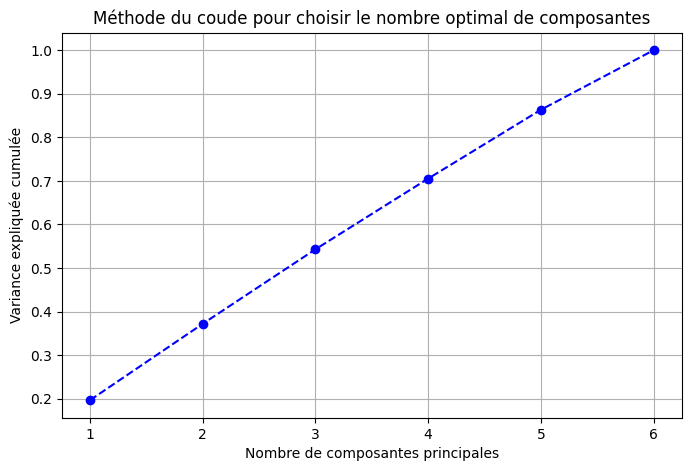

In [6]:
# Sélectionner les variables quantitatives pour l'ACP
columns_for_pca = ['omega-3-fat_100g', 'omega-6-fat_100g', 'iron_100g', 'energy-from-fat_100g', 'calcium_100g', 'nutrition-score-fr_100g']

# Vérifier les valeurs manquantes
print(nutritional_products[columns_for_pca].isna().sum())

# Remplacement des valeurs manquantes par la médiane
nutritional_products_clean = nutritional_products[columns_for_pca].fillna(nutritional_products[columns_for_pca].median())

# Vérifier si le DataFrame est vide après correction
#print(f"Nombre total de lignes après remplacement des NaN : {nutritional_products_clean.shape[0]}")

# Standardisation des données
scaler = StandardScaler()
nutritional_products_scaled = scaler.fit_transform(nutritional_products_clean)

# Affichage de la forme des données après standardisation
#print(f"Shape du dataset après standardisation: {nutritional_products_scaled.shape}")

pca_model = plot_elbow_curve2(nutritional_products_scaled)

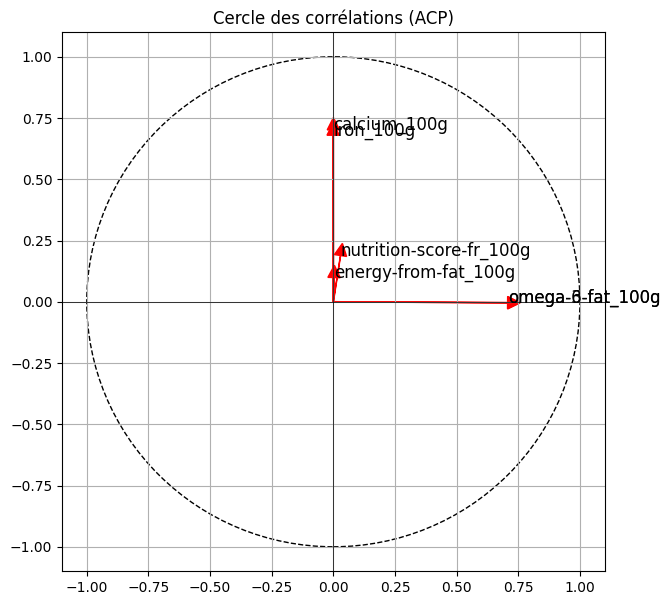

In [7]:
# Appeler la fonction après l'entraînement de ton modèle PCA
plot_correlation_circle(pca_model, columns_for_pca)

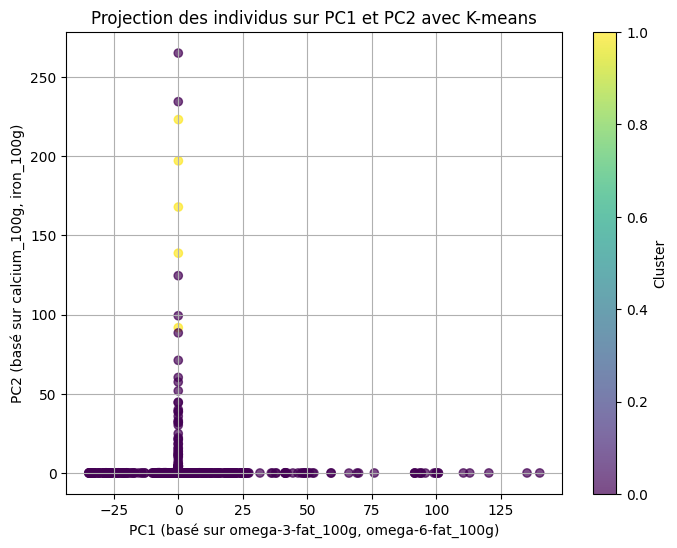

In [8]:
# Exemple d'appel de la fonction avec un DataFrame et une liste de variables
plot_pca_kmeans_projection(nutritional_products, variables_pc_x=["omega-3-fat_100g", "omega-6-fat_100g"], variables_pc_y=["calcium_100g", "iron_100g"], n_clusters=2, pc_x=0, pc_y=1)
